### Import libraries

In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load Data

In [2]:
houseprice_df = pd.read_csv('../input/kc-house-data/kc_house_data.csv')

# Pre-process Data

In [3]:
houseprice_df.head()
houseprice_df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15827,1656600280,20141002T000000,655000.0,4,2.50,3110,24466,2.0,0,0,...,9,3110.0,0,1997,0,98059,47.4898,-122.127,3080,22185
7749,4058200985,20140911T000000,472000.0,3,1.75,2180,7200,1.0,0,3,...,8,1090.0,1090,1954,0,98178,47.5044,-122.235,2180,7140
14715,9285800790,20150406T000000,590000.0,5,1.00,1840,6710,1.5,0,0,...,7,1840.0,0,1920,0,98126,47.5686,-122.378,1410,4880
13136,2591010040,20141110T000000,468000.0,2,1.75,1250,7029,1.0,0,0,...,7,1250.0,0,1986,0,98033,47.6936,-122.186,1680,8470
2647,7518500885,20140519T000000,560000.0,4,1.00,1660,4690,1.5,0,0,...,7,1260.0,400,1945,0,98117,47.6829,-122.378,1400,3876
6654,7950302210,20141114T000000,358000.0,4,2.00,2200,3060,1.0,0,0,...,7,1100.0,1100,1908,2000,98118,47.5650,-122.284,1410,5100
7811,122029066,20150508T000000,490000.0,3,1.75,2020,215622,2.0,0,0,...,7,2020.0,0,1975,0,98070,47.4189,-122.499,1810,215622
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410.0,0,2007,0,98040,47.5653,-122.223,2290,10125
4876,8682310460,20140709T000000,498800.0,2,1.75,1350,4614,1.0,0,0,...,8,1350.0,0,2008,0,98053,47.7091,-122.015,1680,4775
9800,1545804820,20141111T000000,240000.0,3,1.75,1380,7500,1.0,0,0,...,7,1380.0,0,1988,0,98038,47.3628,-122.045,1530,7500


In [4]:
houseprice_df.shape

(21613, 21)

# Drop unneccessary columns

In [5]:
houseprice_df = houseprice_df.drop(["id","date","zipcode","lat","long"],axis=1)

<AxesSubplot:xlabel='yr_renovated'>

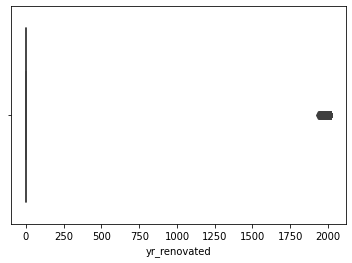

In [6]:
sns.boxplot(data=houseprice_df,x='yr_renovated')

In [7]:
houseprice_df.loc[houseprice_df["yr_renovated"]>1,"yr_renovated"]=1

In [8]:
houseprice_df["yr_renovated"].head()

0    0
1    1
2    0
3    0
4    0
Name: yr_renovated, dtype: int64

# Clean Null values

In [9]:
houseprice_df=houseprice_df.dropna()

In [10]:
houseprice_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
col_name=["view","yr_renovated","waterfront"]

In [12]:
for col in col_name:
    houseprice_df[col]=houseprice_df[col].astype("category", copy=False)

# Explore Dataset

In [13]:
houseprice_df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated     category
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [14]:
houseprice_df.to_csv('houseprice_clean.csv',index=False,header=True)

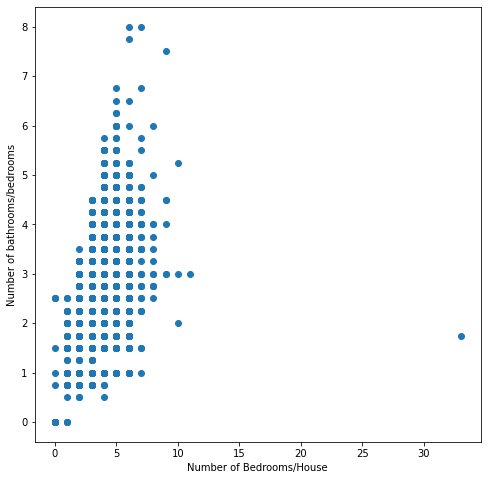

In [15]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(houseprice_df['bedrooms'], houseprice_df['bathrooms'])

plt.xlabel('Number of Bedrooms/House')
plt.ylabel('Number of bathrooms/bedrooms')
plt.show()

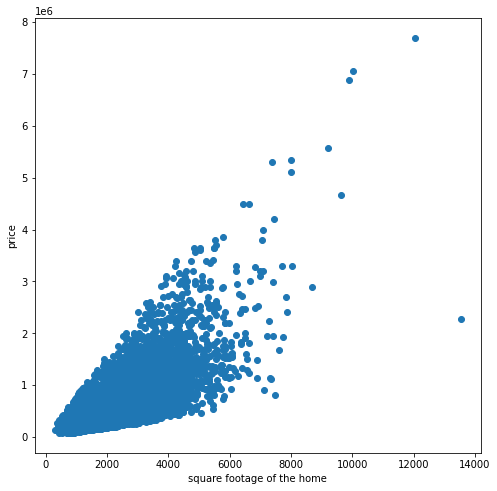

In [16]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(houseprice_df['sqft_living'], houseprice_df['price'])

plt.xlabel('square footage of the home')
plt.ylabel('price')
plt.show()


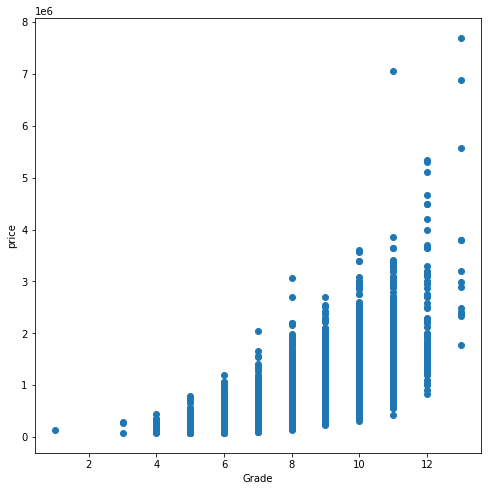

In [17]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(houseprice_df['grade'], houseprice_df['price'])

plt.xlabel('Grade')
plt.ylabel('price')
plt.show()

In [18]:
houseprice_corr=houseprice_df.corr()
houseprice_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.036379,0.667434,0.605567,0.323842,0.054006,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,0.028433,0.356998,0.477616,0.303251,0.154248,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,-0.124917,0.664981,0.685363,0.283737,0.505968,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,-0.058689,0.762727,0.876644,0.434925,0.318066,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,-0.008951,0.113617,0.183511,0.015301,0.053061,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.279907,-0.011275
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,-0.144647,1.000000,0.755924,0.168375,0.446958,0.713197,0.119243
sqft_above,0.605567,0.477616,0.685363,0.876644,0.183511,0.523899,-0.158206,0.755924,1.000000,-0.051976,0.423915,0.731871,0.194048
sqft_basement,0.323842,0.303251,0.283737,0.434925,0.015301,-0.245634,0.174273,0.168375,-0.051976,1.000000,-0.133195,0.200341,0.017292


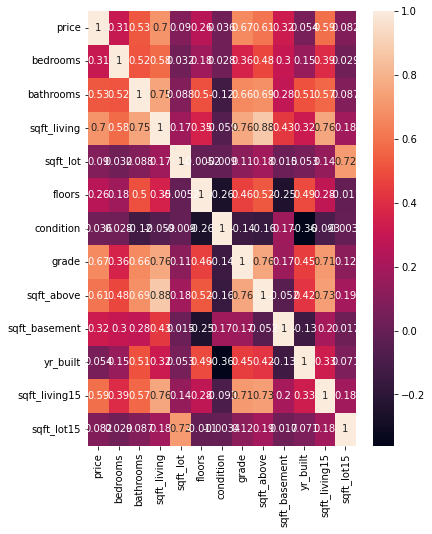

In [19]:
fig, ax=plt.subplots(figsize=(6,8))
sns.heatmap(houseprice_corr,annot=True)
plt.show()


# Build and Train the Model

In [20]:
Y = houseprice_df['price']

In [21]:
X = houseprice_df.drop('price', axis = 1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [23]:
x_train.shape , y_train.shape

((12966, 15), (12966,))

In [24]:
x_test.shape , y_test.shape

((8645, 15), (8645,))

In [25]:
reg= LinearRegression().fit(x_train,y_train)
reg.score(x_test,y_test)

0.6441800571893719

# Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
reg = LinearRegression()

scores = cross_val_score(reg, X, Y, cv=5, scoring='r2')

In [28]:
scores

array([0.65605518, 0.65077556, 0.64342074, 0.65808578, 0.62575563])